## Plot tiles to check data quality


In [1]:

import xarray as xr
import rioxarray as rioxr
import os
import matplotlib.pyplot as plt
import glob
import numpy as np
homedir = '/Users/tud500158/Library/Mobile Documents/com~apple~CloudDocs/Documents/Documents - TUD500158/'

In [62]:
# use composite image as test tile
path_s2 = os.path.join(homedir, 'github/AutomatedDamageDetection/data_tmp/')
path_s2_pred = os.path.join(homedir, 'github/AutomatedDamageDetection/data_tmp/predictions/')
# print(path_s2)

imList_composite_in = glob.glob(os.path.join(path_s2,'S2_composite*.tif'))
imList_composite_pred = glob.glob(os.path.join(path_s2_pred,'S2_composite*.tif'))
imList_composite_in.sort()
imList_composite_pred.sort()
imList_MGRS_in = glob.glob(os.path.join(path_s2,'S2_MGRS*.tif'))
imList_MGRS_pred = glob.glob(os.path.join(path_s2_pred,'S2_MGRS*.tif'))
imList_MGRS_in.sort()
imList_MGRS_pred.sort()

### VIew individual S2 imgs (S2_MGRS)

Input img contains NaN:  False


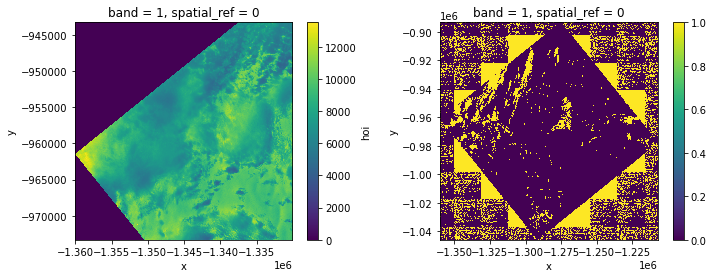

In [74]:

# for imName in imList_s2_in[0:1]:
for imName, imName_pred in zip(imList_MGRS_in[-1:], imList_MGRS_pred[-1:]):
# for imName, imName_pred in zip(imList_MGRS_in, imList_MGRS_pred):
    # print(imName)

    # # load input image 
    img_in = rioxr.open_rasterio(os.path.join(path_s2,imName))
    img_in = img_in.isel(band=[0,1,2]).transpose("y","x","band")
    img_clip = img_in.isel(y=range(5000,8000),x=range(0,3000),band=0)
    img_clip.attrs['long_name']='hoi'
    

    # load predicted img
    img_pred = rioxr.open_rasterio(os.path.join(path_s2_pred,imName_pred))

    # plt.figure()
    fig,axs=plt.subplots(1,2,figsize=(12,4))
    # img_in.plot.imshow()
    img_clip.plot.imshow(ax=axs[0],cbar_kwargs={'fraction':0.045})
    img_pred.isel(band=0).plot.imshow(ax=axs[1],cbar_kwargs={'fraction':0.045})
    [ax.set_aspect('equal') for ax in axs]

    print('Input img contains NaN: ', np.isnan(img_clip.values).any() )


In [78]:

img_in = rioxr.open_rasterio(os.path.join(path_s2,imName)) # int16
img_in.dtype # int16
img_in = rioxr.open_rasterio(os.path.join(path_s2,imName)).astype("float32")
img_clip = img_in.isel(y=range(5000,8000),x=range(0,3000),band=0)
img_clip.dtype

dtype('float32')

In [79]:
print('Input img contains NaN: ', np.isnan(img_clip.values).any() )

Input img contains NaN:  False


#### View test tile with filled nan

Input img contains NaN:  False
After masking contains NaN:  True


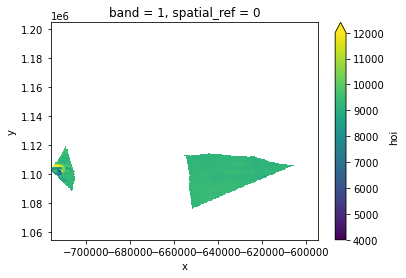

In [181]:
test_MGRS_in = glob.glob(os.path.join(path_s2,'test_S2_MGRS*.tif'))[0]

test_in = rioxr.open_rasterio(test_MGRS_in) 
test_in.attrs['long_name']='hoi'
test_in
# test_in.dtype 
# test_clip = 
test_in.where(test_in > 0,other=np.nan).isel(band=0).plot.imshow(vmin=4e3,vmax=12e3)

print('Input img contains NaN: ', np.isnan(test_in.values).any() )
test_incl_nan = test_in.where(test_in > 0,other=np.nan)
print('After masking contains NaN: ', np.isnan(test_incl_nan.values).any() )


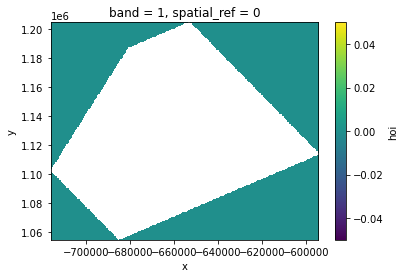

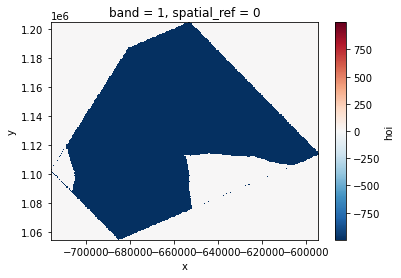

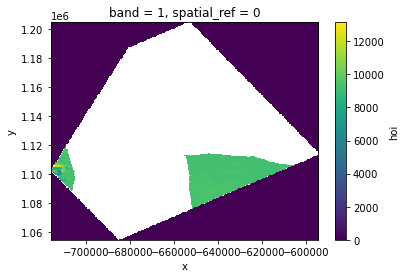

In [187]:
# plt.imshow(test_in > 0) # .plot.imshow()
plt.figure()
test_in.where(test_in == 0,other=np.nan).isel(band=0).plot.imshow()
plt.figure()
test_in.where(test_in == -999,other=1).isel(band=0).plot.imshow()
plt.figure()
test_in.where(test_in!=-999).isel(band=0).plot.imshow()

In [155]:
# test_in.where( test_in.sum(dim='band') == 0 ).plot.imshow()
all_bands_nodata = test_in.sum(dim='band') == 0
slice_list = []
for iter in range(len(test_in.band)):
    slice_list = [all_bands_nodata] + slice_list
    # all_bands_nodata = xr.concat([all_bands_nodata, all_bands_nodata],dim='band')
all_bands_nodata
# all_bands_nodata = xr.concat(slice_list)
len(slice_list)
all_bands_nodata = xr.concat(slice_list,dim='band')
all_bands_nodata

test_in.where(all_bands_nodata,other=np.nan)

<xarray.DataArray (band: 4, y: 300, x: 243)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * band         (band) int64 1 2 3 4
  * x            (x) float64 -7.158e+05 -7.152e+05 ... -5.952e+05 -5.948e+05
  * y            (y) float64 1.204e+06 1.204e+06 ... 1.055e+06 1.055e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     hoi

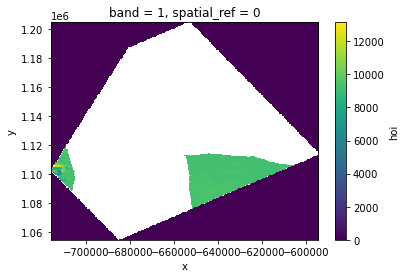

In [185]:

test_in.where(test_in!=-999).isel(band=0).plot.imshow()#, other=np.nan)

Input img contains NaN:  True


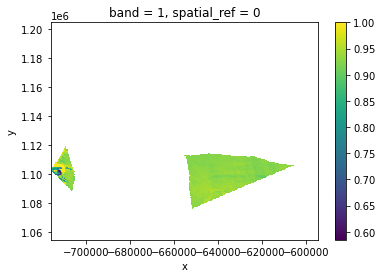

In [117]:

from skimage import exposure as skimage_exposure

def normalise_and_equalise(da,normThreshold=None,equalise=False):
    
    # normalize
    if normThreshold is not None:
        da = (da + 0.1) / (normThreshold + 1)
        da = da.clip(max=1)
    
    if equalise:
        # hist equalist
        n_bands = da['band'].shape[0]
        all_band_eq=np.empty(da.shape)

        for band_i in range(n_bands): # perform adaptive normalisation per band
            band_data = da.isel(band=band_i)
            band_data_eq = skimage_exposure.equalize_adapthist(band_data, clip_limit=0.03)
            all_band_eq[band_i] = np.expand_dims(band_data_eq,axis=0)

        da = da.copy(data=all_band_eq) # overwrite data in dataArray
    
    return da

test_normalised = normalise_and_equalise(test_incl_nan,normThreshold=10e3,equalise=True)
test_normalised.isel(band=0).plot.imshow()
test_normalised
print('Input img contains NaN: ', np.isnan(test_normalised.values).any() )


### View S2  composites (tiled)

Input img contains NaN:  False


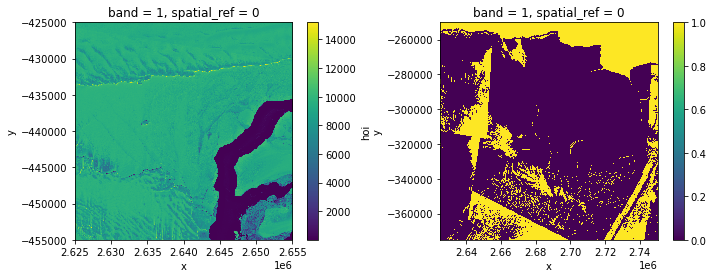

In [80]:

for imName, imName_pred in zip(imList_composite_in[2:3], imList_composite_pred[2:3]):
# for imName, imName_pred in zip(imList_composite_in, imList_composite_pred):
    # print(imName)

    # # load input image 
    img_in = rioxr.open_rasterio(os.path.join(path_s2,imName))
    img_in = img_in.isel(band=[0,1,2]).transpose("y","x","band")
    img_clip = img_in.isel(y=range(5000,8000),x=range(0,3000),band=0)
    img_clip.attrs['long_name']='hoi'
    

    # load predicted img
    img_pred = rioxr.open_rasterio(os.path.join(path_s2_pred,imName_pred))

    # plt.figure()
    fig,axs=plt.subplots(1,2,figsize=(12,4))
    img_clip.plot.imshow(ax=axs[0],cbar_kwargs={'fraction':0.045})
    img_pred.isel(band=0).plot.imshow(ax=axs[1],cbar_kwargs={'fraction':0.045})
    [ax.set_aspect('equal') for ax in axs]

    print('Input img contains NaN: ', np.isnan(img_clip.values).any() )


### For comparison: view S1 relorb

Input img contains NaN:  True


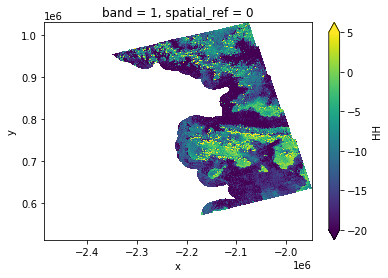

In [66]:
## Test: open S1 relorb to see if that one has nan
relorb_file = os.path.join(homedir,'Data/S1_SAR/relorbs/2021-22/relorb_S1B_EW_GRDM_1SSH_20211211T005545_20211211T005649_029970_0393F0_2570_100m.tif')
img_relorb =rioxr.open_rasterio(relorb_file)
img_relorb.isel(band=0).plot.imshow(vmin=-20,vmax=5)
# np.isnan(img_relorb.values).any()
print('Input img contains NaN: ', np.isnan(img_relorb.values).any() )

In [72]:
img_relorb.isel(band=0).dtype # float64
# img_in  

dtype('float64')

In [30]:
nan_mask = np.isnan(img_in)
nan_mask.any()

<xarray.DataArray ()>
array(False)
Coordinates:
    spatial_ref  int64 0

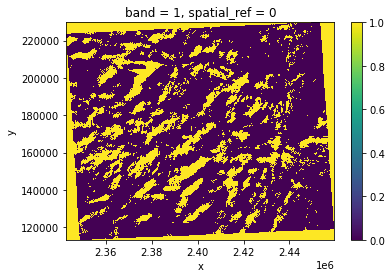

In [28]:
import numpy as np
np.isnan(img_pred).any()

<xarray.DataArray ()>
array(False)
Coordinates:
    spatial_ref  int64 0